# ローパスフィルタとスペクトログラムの変換関数プログラムの作成

# 6月20の作業内容記載

# ライブラリのインポート

In [35]:
import IPython.display as ipd
from scipy.io import wavfile
import os
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import librosa
import librosa.display 

In [36]:
csv_files = os.listdir('Audio/')
#csv_files = os.listdir('../kaggle/nomal_sounds/')
print(csv_files)

['normal_9.WAV', 'normal_8.WAV', '6548838 S7IP.WAV', '20230626', '.DS_Store', 'normal01_Ch0.wav', '7045479 S13IP.WAV', 'normal01_Ch1.wav', '肺音2021年12月分解析10例.docx', 'normal03_Ch0.wav', '6117612 S11IP.WAV', 'normal03_Ch1.wav', 'S22IP-5627886.WAV', '肺音2022解析0802.docx', 'S15IP 3432138.WAV', 'normal02_Ch0.wav', 'S17IP 7067156.WAV', 'S14IP 7897151.WAV', 'S16IP 1639292.WAV', 'test_Ch0.wav', 'normal02_Ch1.wav', 'S23IP-6287348.WAV', 'S18IP 7892062.WAV', 'volume50_Ch0.wav', '20230626.zip', 'normal06_Ch1.wav', '7685790 S9IP.WAV', 'normal06_Ch0.wav', '7416697 S4IP.WAV', 'normal_1.WAV', '8028767 S12IP.WAV', 'normal_3.WAV', 'normal04_Ch1.wav', 'S21IP-32502.WAV', 'normal04_Ch0.wav', '7309953 S10IP.WAV', 'normal_2.WAV', 'normal_6.WAV', '7260856 S6IP.WAV', 'normal05_Ch1.wav', 'S20IP-8288358.WAV', 'normal05_Ch0.wav', '2192301 S5IP.WAV', 'normal_7.WAV', 'normal_5.WAV', 'normal_10.WAV', '6702179 S8IP.WAV', 'normal_4.WAV']


## Scipyによる音声ファイル読み込み

In [338]:
# 音声ファイルのパスを指定します。
train_audio_path = 'Audio/'

# 初期設定値
filename = 'normal04_Ch0.wav' #wavファイル名
disease = 'normal04_Ch0' #受診者の肺音の症状
save_flag = 0 #スペクトログラム画像の保存　0:保存しない　1:保存
axis = 1 #軸とサイズ　0:軸なし、サイズ(1584, 256)　1:軸あり、サイズ比(24, 4)　2:軸なし、サイズデフォルト　3:軸あり、サイズデフォルト

name = filename[0:-4] #拡張子抜きファイル名

# 音声データの読み込み
# sample_rate:サンプリング周波数, sample:サンプルwavデータ
sample_rate, samples = wavfile.read(train_audio_path + filename)
#samples = samples[0:100000]
# Player 実行 モノラルではなくステレオなので配列の向きの違いから転置の必要あり
ipd.Audio(samples.T, rate=sample_rate)

In [339]:
samples.shape

(200000,)

In [340]:
## 確認用　実行しない
'''
test_rate, test_sample = wavfile.read(writefilename)
test_N = test_sample.shape[0] # 標本データ数(要素数)を返す
test_L = len(test_sample)/test_rate # 時間(長さ)の算出
test_plot_time = np.linspace(0, test_L, test_N)
print("サンプリング周波数"+str(test_rate))
print("標本数"+str(test_N))
print("総時間"+str(test_L))

ipd.Audio(test_sample.T, rate=test_rate)
#横軸　時間　WAVプロット
wav_plot(filename, test_plot_time, test_sample, 0)
'''
print()

## librosaによる音声ファイル読み込み
scipyと違い振幅が-1~1で正規化される。  
scipyとlibrosaどちらで読み取りするか選択

In [341]:
# 音声ファイルのパスを指定します。
'''
train_audio_path = '../train/Audio/normal'
filename = 'normal_3.WAV'
samples, sample_rate = librosa.load(str(train_audio_path) + filename,sr=10240, mono=True)
ipd.Audio(samples, rate=sample_rate)
'''
print()

## 波形表示するための標本データ数、時間を求める

In [342]:
N = samples.shape[0] # 標本データ数(要素数)を返す
L = len(samples)/sample_rate # 時間(長さ)の算出
plot_time = np.linspace(0, L, N) # グラフ描画のための時間軸の生成

print("サンプリング周波数"+str(sample_rate))
print("標本数"+str(N))
print("総時間"+str(L))
print("データの型"+str(samples.dtype))
print("セグメント"+str(L/132))
#print(samples)
#print(samples.ndim)


# 見附実験用
#print(L/132.0)
#print((L/132.0)*8)
#print(((L/132.0)*8)+(L/132.0))

サンプリング周波数10000
標本数200000
総時間20.0
データの型int16
セグメント0.15151515151515152


## 音声ファイル改変用
信号をいじって色々試すためのコードなので基本実行しなくていい

In [343]:
#samples=samples*40000

## WAVファイルの視覚化　：ステレオで両チャンネルを重ね表示

In [344]:
# wav_plot(ファイル名, 音声データの時間軸, 音声データ, 軸の種類　0:時間軸 1:サンプル軸):
def wav_plot(filename, plot_time, samples, s_num):
    # 音声の波形 (sound wave)を視覚化します。
    fig = plt.figure(figsize=(18, 4))
    ax1 = fig.add_subplot(111)
    ax1.set_title('Raw wave of ' + filename)
    ax1.set_ylabel('Amplitude')
    
    if s_num == 0:
        ax1.plot(plot_time, samples)
    else:
        ax1.plot(samples)
        
    #ax1.set_ylim([-10000,10000])
    #plt.savefig("wave_plot/normal/"+filename+".png")

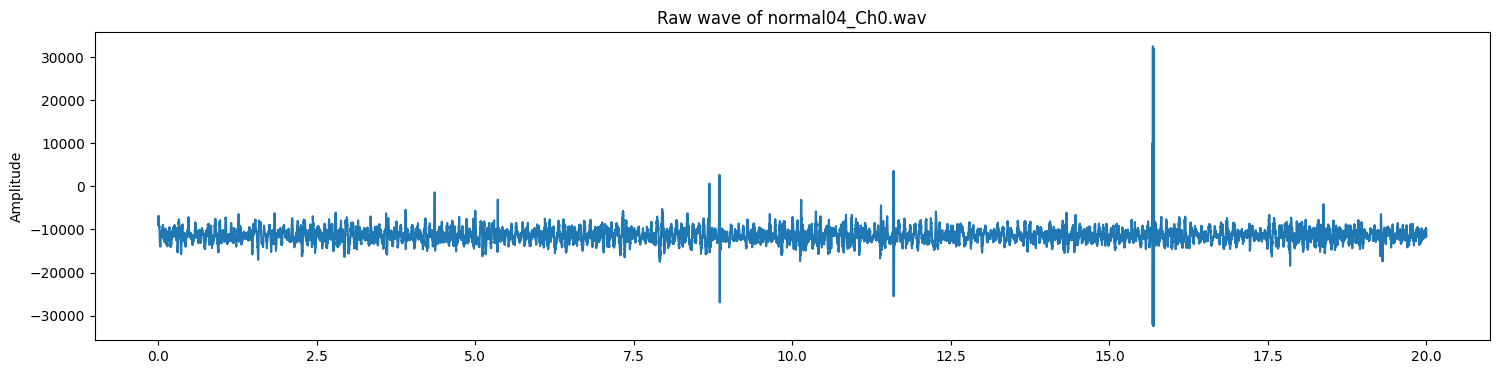

In [345]:
#横軸　時間　WAVプロット
wav_plot(filename, plot_time, samples, 0)

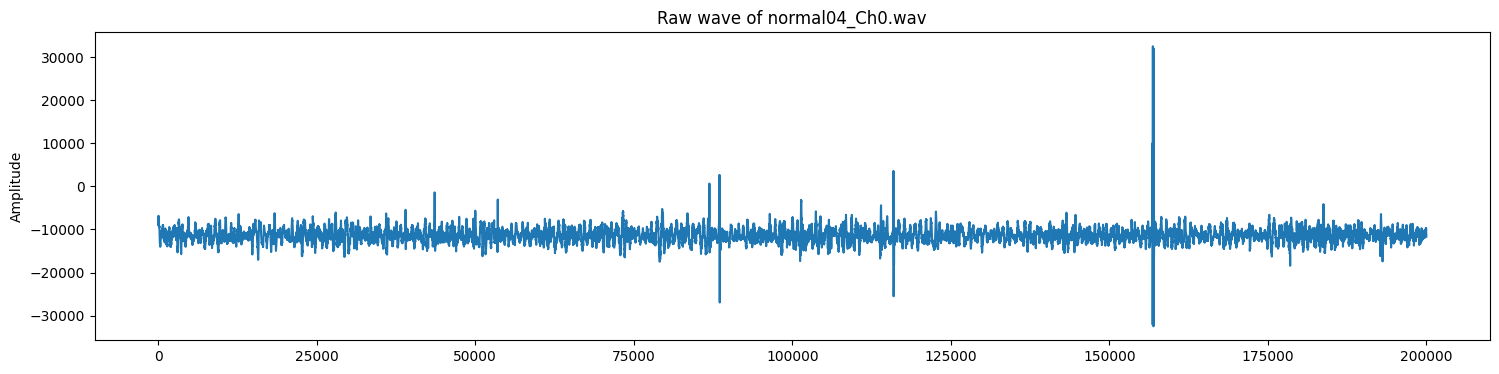

In [346]:
#横軸　サンプル数　WAVプロット
wav_plot(filename, plot_time, samples, 1)

m_samples = samples.copy()
m_N = samples.shape[0] # 標本数(要素数)を返す
m_L = N/sample_rate # 時間(長さ)の算出

## ステレオ型からモノラルへ　２chを分離

In [347]:
'''
left_samples=samples[:,0].copy()
right_samples=samples[:,1].copy()
#横軸　時間　WAVプロット
wav_plot(filename, plot_time, left_samples, 0)
#横軸　時間　WAVプロット
wav_plot(filename, plot_time, right_samples, 0)
'''

'\nleft_samples=samples[:,0].copy()\nright_samples=samples[:,1].copy()\n#横軸\u3000時間\u3000WAVプロット\nwav_plot(filename, plot_time, left_samples, 0)\n#横軸\u3000時間\u3000WAVプロット\nwav_plot(filename, plot_time, right_samples, 0)\n'

### 指定時間幅の信号を表示

In [348]:
'''
start_time = 1 #開始時間
end_time = 5 #終了時間
start_sample = start_time*sample_rate
end_sample = end_time*sample_rate
#横軸　時間　WAVプロット
wav_plot(filename, plot_time[start_sample:end_sample], left_samples[start_sample:end_sample], 0)
'''

'\nstart_time = 1 #開始時間\nend_time = 5 #終了時間\nstart_sample = start_time*sample_rate\nend_sample = end_time*sample_rate\n#横軸\u3000時間\u3000WAVプロット\nwav_plot(filename, plot_time[start_sample:end_sample], left_samples[start_sample:end_sample], 0)\n'

## ステレオ信号をモノラル信号に変換
2chの平均をとるか・分散の大きい信号を選ぶか

In [349]:
def ste_to_mono(left_samples=[], right_samples=[], samples=[], mono='var'):
    
    # 平均
    if mono=='mean':
        mono_samples = np.mean(samples, axis=1) # ステレオを平均してモノラルに変換
        
        
    # 分散の大きい信号
    elif mono=='var' and len(samples)==0:
        
        left_var=left_samples.var()
        right_var=right_samples.var()
        
        if left_var>right_var:
            mono_samples=left_samples
        elif left_var<=right_var:
            mono_samples=right_samples
        else:
            mono_samples=0
    else:
        mono_samples=samples
            
    m_N = samples.shape[0] # 標本数(要素数)を返す
    m_L = N/sample_rate # 時間(長さ)の算出
        
        
    return mono_samples,m_N,m_L

## モノラルに変換した波形の表示

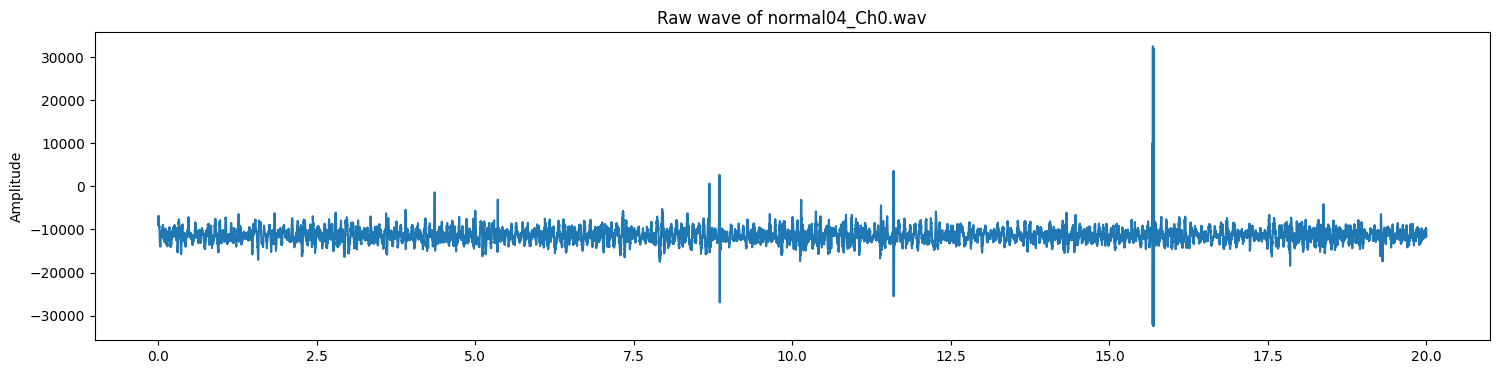

In [350]:
mono_samples,m_N,m_L = ste_to_mono(samples=samples, mono='var')
#横軸　時間　WAVプロット
wav_plot(filename, plot_time, mono_samples, 0)

## low-passフィルタ

In [351]:
'''
def low_pass(fc, mono_sample, sample_rate, m_N, m_L):
    f_time = np.linspace(0, m_L, m_N)
    dt = 1.0/sample_rate
    f_freq = np.linspace(0, sample_rate, m_N)

    F = np.fft.fft(mono_samples)
    F = F/(m_N/2)
    F[0] = F[0]/2
    F2 = F.copy()
    F2[(f_freq > fc)] = 0
    f2 = np.fft.ifft(F2)
    f2 = np.real(f2*m_N)
    
    return f2
'''

'\ndef low_pass(fc, mono_sample, sample_rate, m_N, m_L):\n    f_time = np.linspace(0, m_L, m_N)\n    dt = 1.0/sample_rate\n    f_freq = np.linspace(0, sample_rate, m_N)\n\n    F = np.fft.fft(mono_samples)\n    F = F/(m_N/2)\n    F[0] = F[0]/2\n    F2 = F.copy()\n    F2[(f_freq > fc)] = 0\n    f2 = np.fft.ifft(F2)\n    f2 = np.real(f2*m_N)\n    \n    return f2\n'

In [352]:
'''
fc = 500 #カットオフ周波数
low_pass_wave = low_pass(fc,mono_samples,sample_rate,m_N,m_L)
m_samples = low_pass_wave.copy()

#横軸　時間　WAVプロット
wav_plot(filename, plot_time, m_samples, 0)
'''

'\nfc = 500 #カットオフ周波数\nlow_pass_wave = low_pass(fc,mono_samples,sample_rate,m_N,m_L)\nm_samples = low_pass_wave.copy()\n\n#横軸\u3000時間\u3000WAVプロット\nwav_plot(filename, plot_time, m_samples, 0)\n'

# フィルタ適用後の音声ファイルを保存

In [353]:
'''
import soundfile as sf

m_samples = m_samples.astype(np.int16)# 型変換：int16型でなければ、元の量子化ビット数16ビットで保存できない
writefilename = "lowpass/lowpass_audio/"+disease+"/"+str(fc)+"Hz/"+name+"_lowpass.WAV" 
sf.write(writefilename, m_samples, sample_rate)

# data information
print("Sampling rate:", sample_rate)
print("Frame num:", m_samples.shape[0])
print("Sec:", m_samples.shape[0] / sample_rate)
print("Numpy dtype:", m_samples.dtype)
'''
m_samples = mono_samples

# スペクトログラム変換

In [354]:

# 短時間フーリエ変換による通常のスペクトログラム
def specgram(audio, sample_rate, window_size=20,step_size=10, eps=1e-10):#スペクトグラム生成
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio, fs=sample_rate,
                                            window='hann',nperseg=nperseg,
                                            noverlap=noverlap,
                                            detrend=False)
    return freqs, times, spec.T.astype(np.float32)

# 短時間フーリエ変換結果に対数を取ったlog-スペクトログラム
def log_specgram(audio, sample_rate, window_size=20, step_size=10, esp=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio, fs=sample_rate,
                                            window='hann',nperseg=nperseg, #窓関数はHANNING窓
                                            noverlap=noverlap,
                                            detrend=False)
    print(esp)
    return freqs, times, np.log(spec.T.astype(np.float32) + esp)

# スペクトログラムの描画
def spec_show(freqs, times, spec, ticks, axis, save, save_flag=0):
    
    #軸の描画
    if axis == 0:#軸なし、サイズ(1584, 256)
        fig = plt.figure(dpi=1,figsize=(1584, 256))
        ax1 = fig.add_subplot(111)
        ax1.axis("off")
        fig.tight_layout()
        fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
        ax1.imshow(spec.T, aspect='auto', origin='lower', extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    elif axis == 1:#軸あり、サイズ(24, 4)
        fig = plt.figure(figsize=(24, 4))
        ax1 = fig.add_subplot(111)
        ax1.imshow(spec.T, aspect='auto', origin='lower', extent=[times.min(), times.max(), freqs.min(), freqs.max()])
        ax1.set_yticks(freqs[::10])
        ax1.set_xticks(times[::50])
        ax1.set_title('spectrogram of ' + filename)
        ax1.set_ylabel('Frequency (Hz)')
        ax1.set_xlabel('Time (s)')
    elif axis == 2:#軸なし、サイズデフォルト
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.axis("off")
        fig.tight_layout()
        fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
        ax1.imshow(spec.T, aspect='auto', origin='lower', extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    elif axis == 3:#軸あり、サイズデフォルト
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.imshow(spec.T, aspect='auto', origin='lower', extent=[times.min(), times.max(), freqs.min(), freqs.max()])
        ax1.set_yticks(freqs[::10])
        ax1.set_xticks(times[::50])
        ax1.set_title('spectrogram of ' + filename)
        ax1.set_ylabel('Frequency (Hz)')
        ax1.set_xlabel('Time (s)')
    else:
        print("not plot image")
        
    # 刻み幅の変更
    if ticks != 0:
        ax1.set_xticks(np.arange(0, times[-1], ticks))

    # 画像の保存
    print(save_flag)
    if save_flag != 0:
        if axis == 1 or axis == 3:#軸あり
            plt.savefig("Spectrogram/"+"axis_"+save+"/axis_"+name+"_"+save+".png")
        elif axis == 0 or axis == 2:#軸なし
            plt.savefig("Spectrogram/"+save+"/"+name+"_"+save+".png")
        else:
            print("not save image")

## 通常のスペクトログラム

In [1]:
freqs, times, spectrogram = specgram(m_samples, sample_rate)
spec_show(freqs=freqs,times=times,spec=spectrogram, ticks=0, axis=axis, save='spec',save_flag=0)

NameError: name 'specgram' is not defined

## logスペクトログラム変換

In [356]:
#librosa version
'''
D = np.abs(librosa.stft(y=m_samples, n_fft=2048, hop_length=512))
DB = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(16, 6))
librosa.display.specshow(DB, sr=sample_rate, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()
'''
print()

1e-10
0


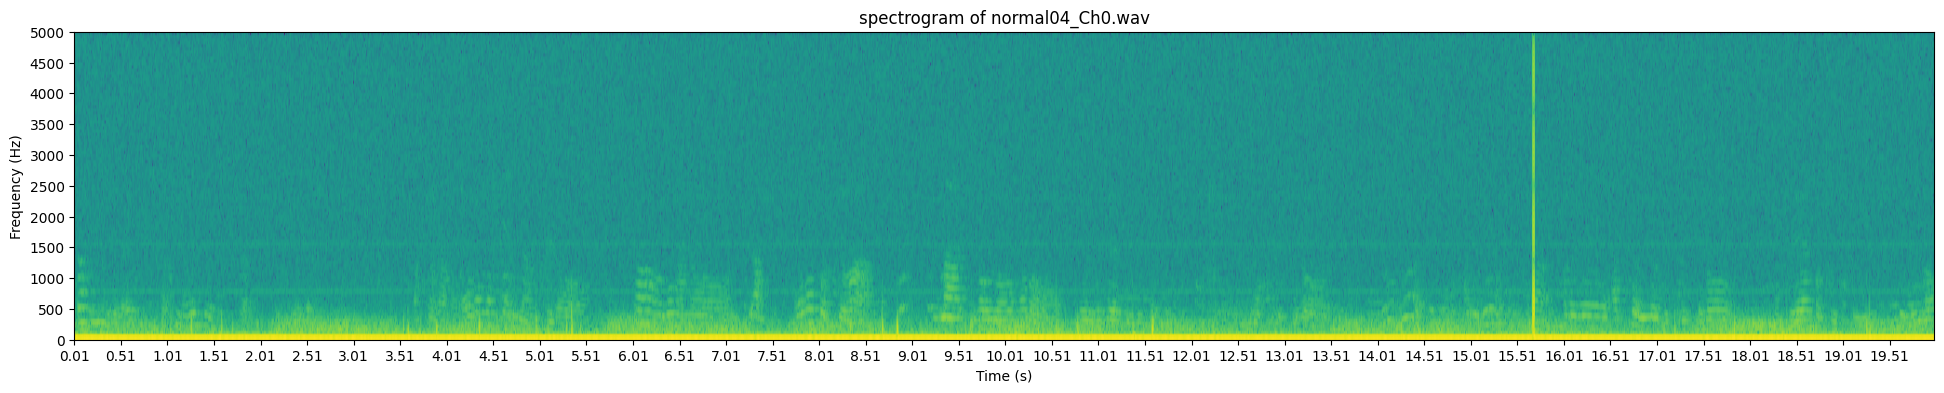

In [357]:
freqs, times, log_spectrogram = log_specgram(m_samples, sample_rate)
spec_show(freqs=freqs,times=times,spec=log_spectrogram,ticks=0,axis=axis,save='log_spec', save_flag=save_flag)

In [358]:
#librosaを利用するために信号データをfloat型に変換
m_samples=m_samples.astype(np.float16)
m_samples

array([ -8944.,  -8880.,  -8792., ..., -11664., -11664., -11664.],
      dtype=float16)

# melスペクトログラム変換

In [359]:
def mel_spec(m_samples, sample_rate, db, n_mels, n_fft=2048, hop_length=512, win_length=None):
    S = librosa.feature.melspectrogram(y=m_samples, sr=sample_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
    if db=='amp': #振幅をdbスケールに変換
        S_DB = librosa.amplitude_to_db(S, ref=np.max)
    elif db=='power': #振幅の二乗をdbスケールに変換
        S_DB = librosa.power_to_db(S, ref=np.max)
    else:
        print("can't transform to spectrogram")
        return 0
    return S_DB
    
def mel_spec_show(spec, axis, save, hop_length, y_axis, ticks=0, save_flag=0):
        
    #軸の描画
    if axis == 0:#軸なし、サイズ(1584, 256)
        fig = plt.figure(dpi=1,figsize=(1584, 256))
        ax1 = fig.add_subplot(111)
        ax1.axis("off")
        fig.tight_layout()
        fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
        librosa.display.specshow(S_DB, sr=sample_rate, hop_length=hop_length, x_axis='s', y_axis=y_axis)
    
    elif axis == 1:#軸あり、サイズ(24, 4)
        fig = plt.figure(figsize=(24, 4))
        ax1 = fig.add_subplot(111)
        librosa.display.specshow(S_DB, sr=sample_rate, hop_length=hop_length, x_axis='s', y_axis=y_axis)
        ax1.set_title('mel_amp_spec_' + filename)
        ax1.set_ylabel('Frequency (Hz)')
        ax1.set_xlabel('Time (s)')
        plt.colorbar(format='%+02.0f dB')
    
    elif axis == 2:#軸なし、サイズデフォルト
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.axis("off")
        fig.tight_layout()
        fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
        librosa.display.specshow(S_DB, sr=sample_rate, hop_length=hop_length, x_axis='s', y_axis=y_axis)
    
    elif axis == 3:#軸あり、サイズデフォルト
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        librosa.display.specshow(S_DB, sr=sample_rate, hop_length=hop_length, x_axis='s', y_axis=y_axis)
        ax1.set_title('mel_amp_spec_' + filename)
        ax1.set_ylabel('Frequency (Hz)')
        ax1.set_xlabel('Time (s)')
        plt.colorbar(format='%+02.0f dB')
    
    else:
        print("not plot image")
        
    # 刻み幅の変更
    if ticks != 0:
        ax1.set_xticks(np.arange(0, times[-1], ticks))

    # 画像の保存
    if save_flag != 0:
        if axis == 1 or axis == 3:
            print(save_flag)
            plt.savefig("Spectrogram/"+"axis_"+save+"/axis_"+name+"_"+save+".png")
        elif axis == 0 or axis == 2:
            plt.savefig("Spectrogram/"+save+"/"+name+"_"+save+".png")
        else:
            print("not save image")
        
        

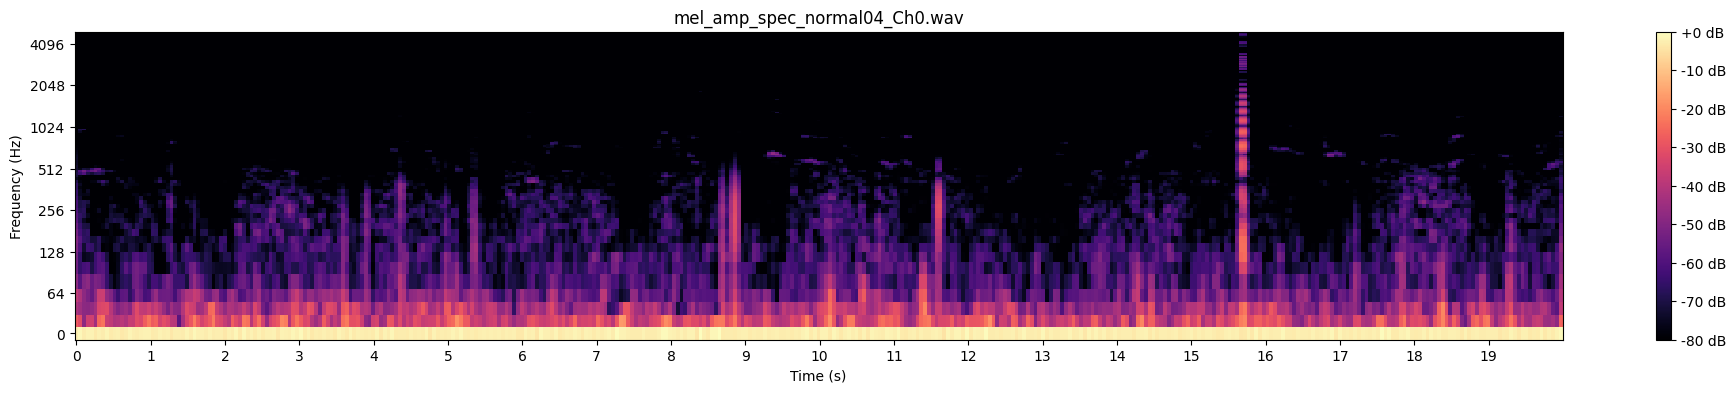

In [360]:
#mel_amp_spec
S_DB = mel_spec(m_samples=m_samples, sample_rate=sample_rate, db='amp', n_mels=256)
mel_spec_show(spec=S_DB,ticks=1,axis=axis,save="mel_amp_spec",hop_length=512,y_axis='log', save_flag=save_flag)

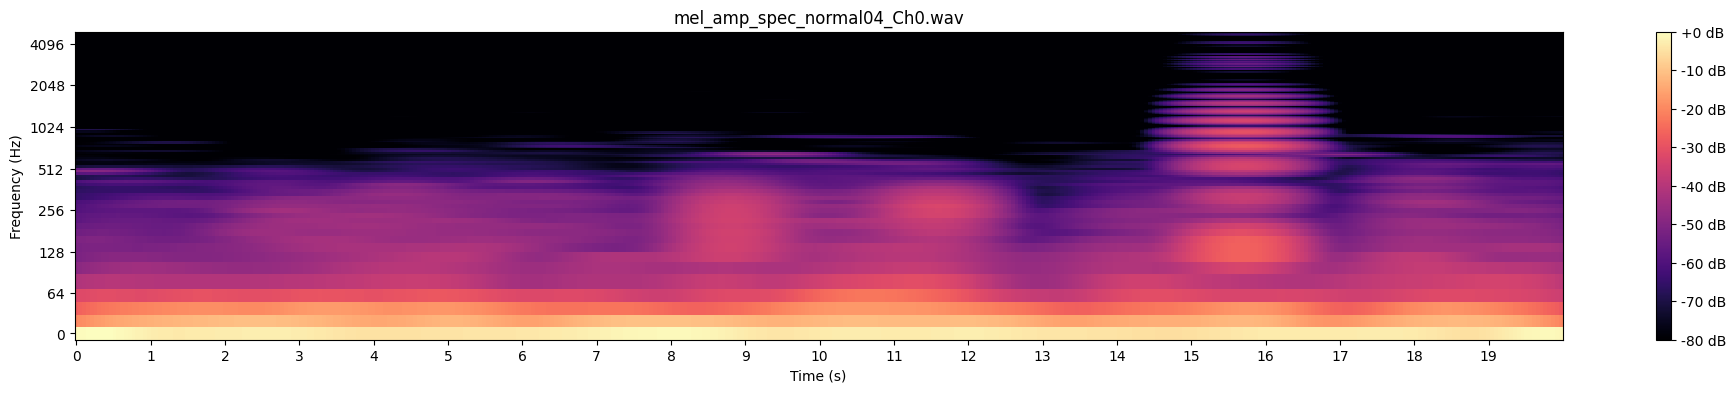

In [361]:
#mel_amp_breathstep_spec
S_DB = mel_spec(m_samples=m_samples, sample_rate=sample_rate, db='amp', n_mels=256,n_fft=32768)
mel_spec_show(spec=S_DB,ticks=1,axis=axis,save="mel_amp_breathstep_spec",hop_length=512,y_axis='log', save_flag=save_flag)

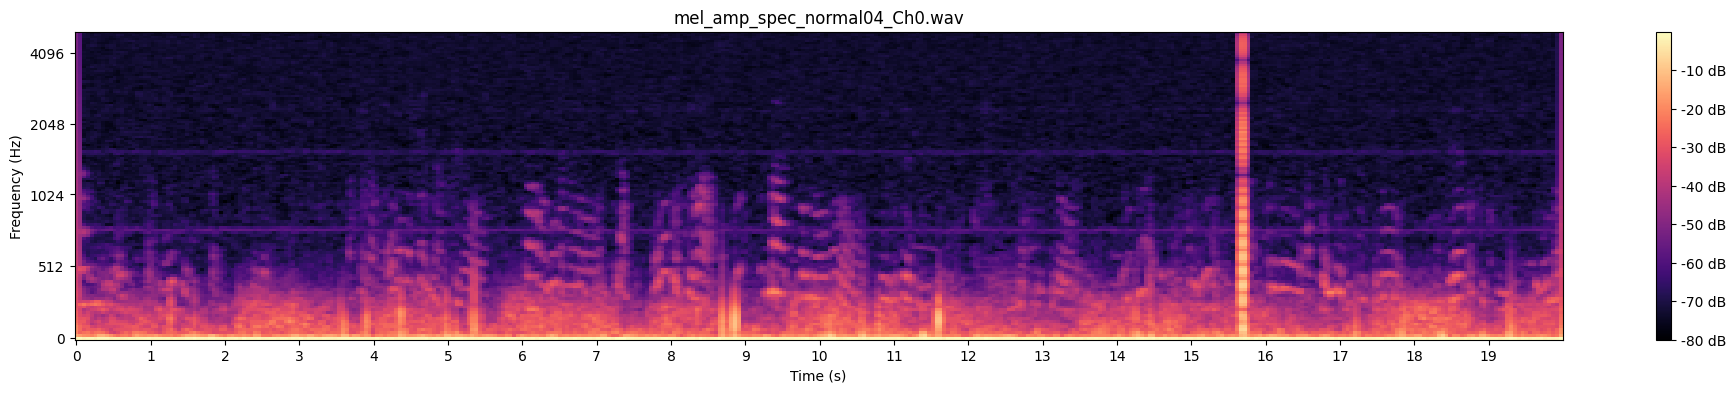

In [362]:
#default_mel_spec
S_DB = mel_spec(m_samples=m_samples, sample_rate=sample_rate, db='power', n_mels=128)
mel_spec_show(spec=S_DB,ticks=1,axis=axis,save="default_mel_spec",hop_length=512,y_axis='mel',save_flag=save_flag)

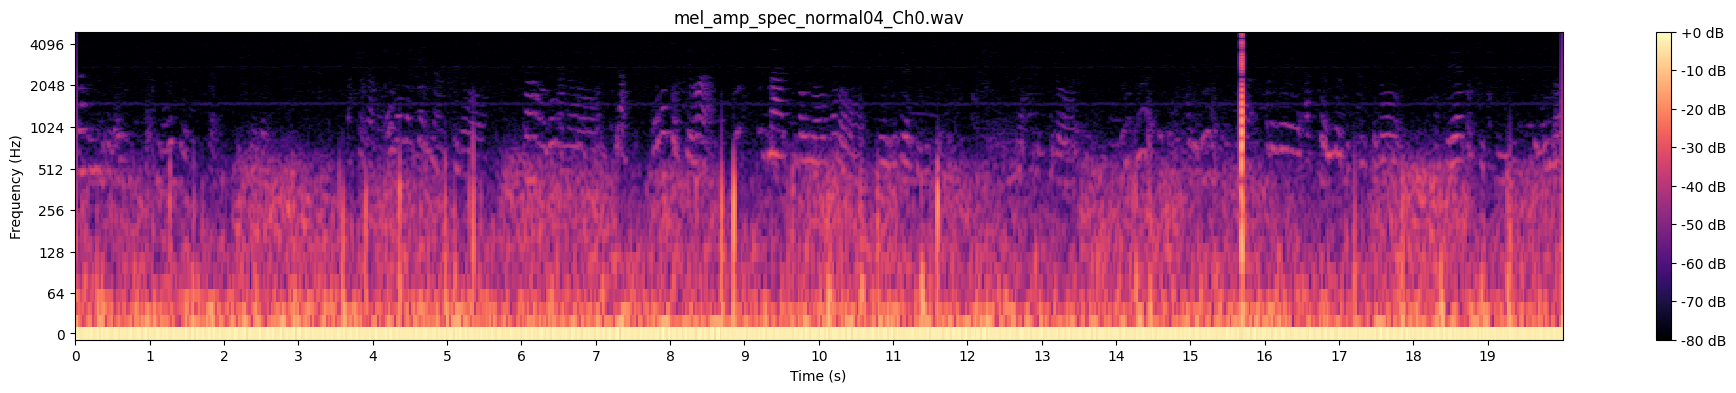

In [363]:
#mel_log_spec
S_DB = mel_spec(m_samples=m_samples, sample_rate=sample_rate, db='power', n_mels=256, n_fft=1024, hop_length=256, win_length=1024)
mel_spec_show(spec=S_DB,ticks=1,axis=axis,save="mel_log_spec",hop_length=256,y_axis='log',save_flag=save_flag)


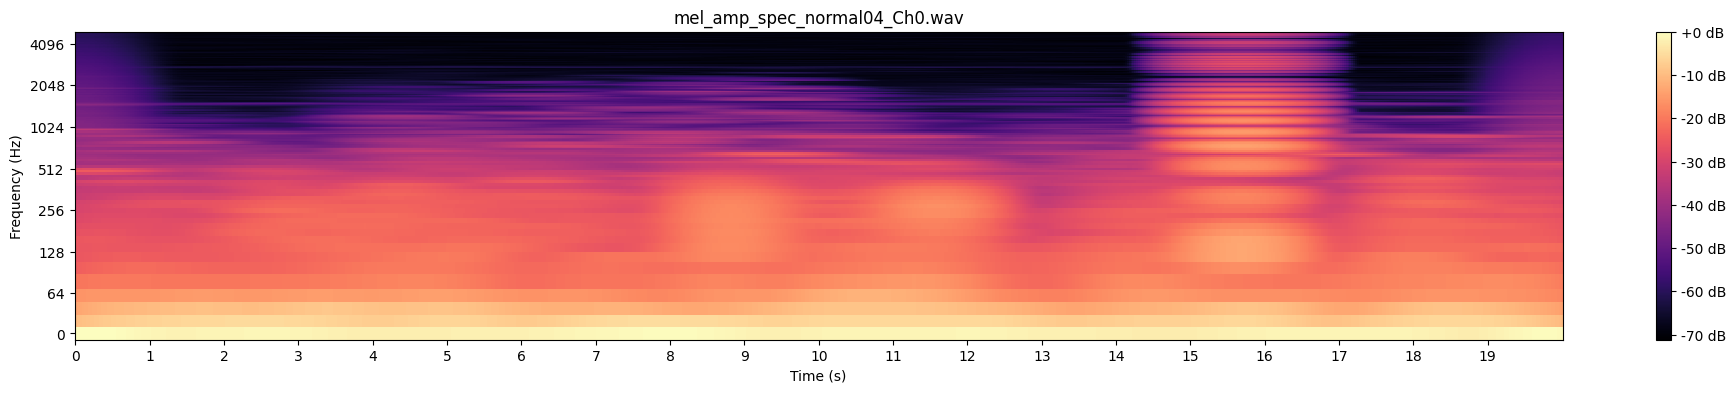

In [364]:
#mel_log_breathstep_spec
S_DB = mel_spec(m_samples=m_samples, sample_rate=sample_rate, db='power', n_mels=256, n_fft=32768, hop_length=256)
mel_spec_show(spec=S_DB,ticks=1,axis=axis,save="mel_log_breathstep_spec",hop_length=256,y_axis='log', save_flag=save_flag)

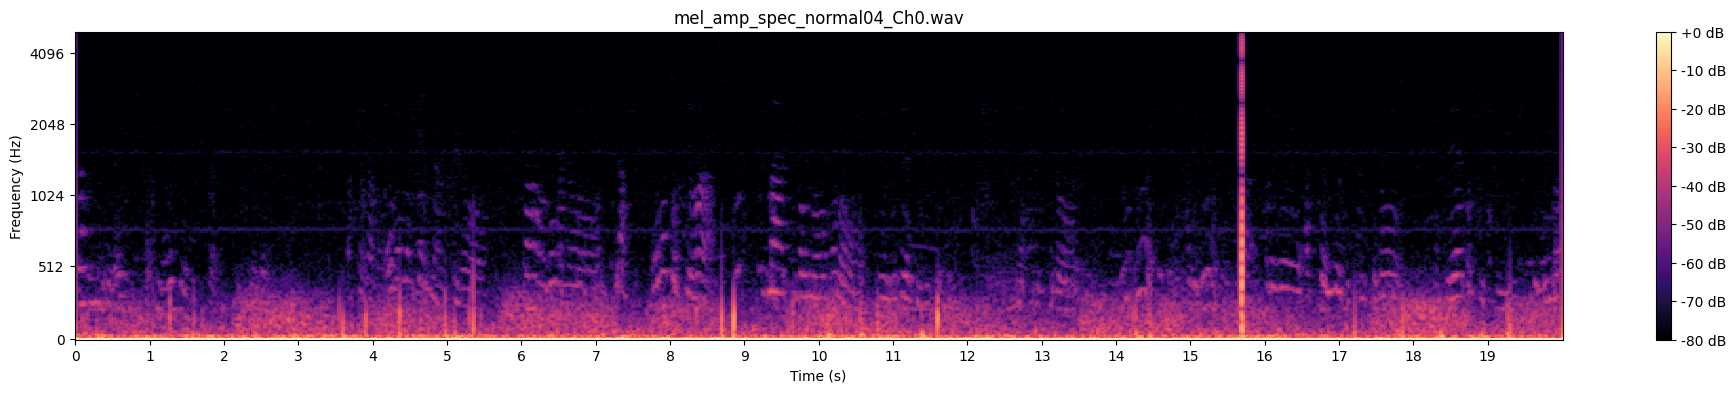

In [365]:
#mel_spec
S_DB = mel_spec(m_samples=m_samples, sample_rate=sample_rate, db='power', n_mels=256, n_fft=1024, hop_length=256, win_length=1024)
mel_spec_show(spec=S_DB,ticks=1,axis=axis,save="mel_spec",hop_length=256,y_axis='mel', save_flag=save_flag)

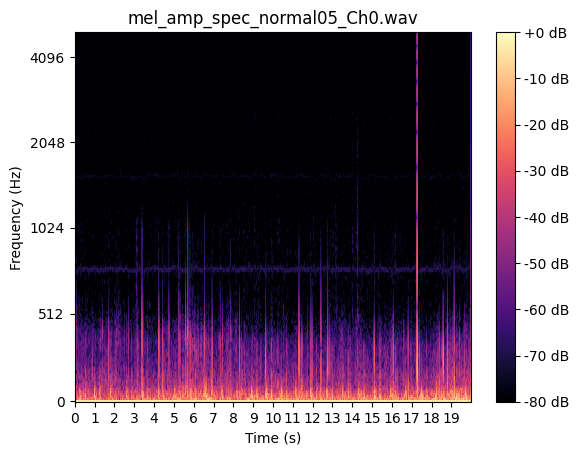

In [309]:
# default_size_mel_spec
S_DB = mel_spec(m_samples=m_samples, sample_rate=sample_rate, db='power', n_mels=256, n_fft=1024, hop_length=256, win_length=1024)
mel_spec_show(spec=S_DB,ticks=1,axis=axis+2,save="default_size_mel_spec",hop_length=256,y_axis='mel', save_flag=save_flag)

---
## 6/20
## ローパスフィルタとスペクトログラムの変換関数プログラムの作成
## 今まで作成した特徴抽出フィルタの実装処理を他のプログラムで利用可能にするため関数化

これまでに利用した特徴抽出フィルタの作成プログラムは全て、関数化されていなかったため、利用する際はソースコードをコピーして貼り付ける必要があった。それを避けるため、信号波形の表示からローパスフィルタ処理、スペクトログラムの変換を全て関数化することを試みた。
関数かしたことにより初期パラメータを設定するだけで、簡易にそれぞれの処理が実行可能になり、他のプログラムで使用する際は、モジュールとして利用できるようになった。
また本プログラムでは作成するスペクトログラムを二種類追加した。呼吸音の間隔に近い窓幅でメルスペクトルグラムを作成するものと、画像の大きさを変化させないで表示させたメルスペクトログラムの二種類を新たに追加した。今後これらをどのように利用するかを検討する。